In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import numpy as np
from datetime import datetime # Para pegar a data atual
import matplotlib.dates as mdates

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv

def encontrar_frase_em_csv(nome_arquivo, frase_procurada):
    try:
        with open(nome_arquivo, 'r', newline='', encoding='utf-8') as arquivo_csv:
            leitor_csv = csv.reader(arquivo_csv)
            
            for numero_linha, linha in enumerate(leitor_csv, start=1):
                if frase_procurada in linha:
                    return numero_linha

        # Se a frase não for encontrada em nenhuma linha
        return -1

    except FileNotFoundError:
        print(f'O arquivo {nome_arquivo} não foi encontrado.')
        return -1

def remover_ultima_linha(arquivo):
    dados = arquivo
    
    # Verificar se a última linha atende ao critério
    ultima_linha = dados.iloc[-1]
    if ultima_linha['Nº dia'] not in ['0030', '0029', '0028', '28', '29', '30']:
        # Se não atender ao critério, remover a última linha
        dados = dados.iloc[:-1]

    return dados

def transforma_int(arquivo):
    
    for i in range(len(arquivo.iloc[:,0])):
        arquivo.iloc[i,0] = int(arquivo.iloc[i,0])
    
    for i in range(len(arquivo.iloc[:,1])):
        arquivo.iloc[i,1] = int(arquivo.iloc[i,1])
    
    return arquivo

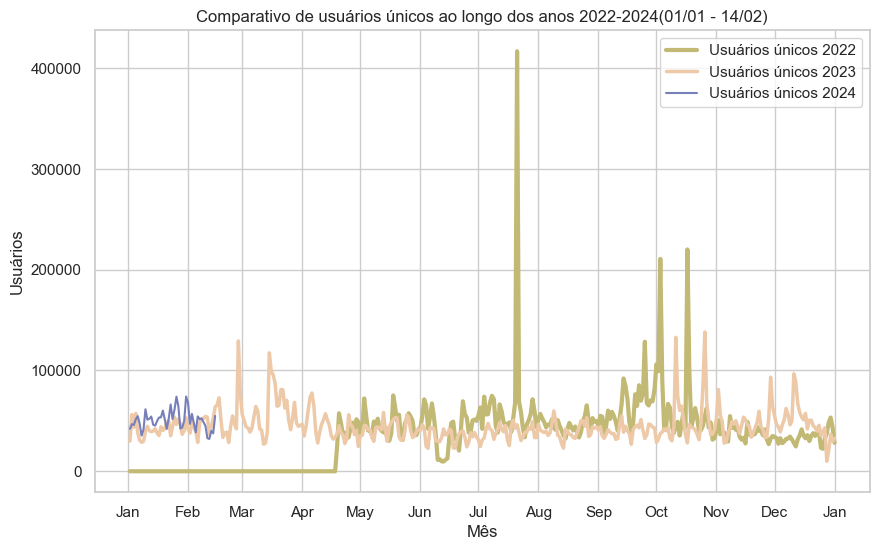

In [31]:
# USUÁRIO ÚNICOS 2022
usuarios_unicos_final = encontrar_frase_em_csv(r'Portal\usuariosUnicosNovos\2022\uniNovos22.csv', 'Novos usuários')

usuarios_unicos22 = pd.read_csv(r'Portal\usuariosUnicosNovos\2022\uniNovos22.csv', skiprows=8, nrows=usuarios_unicos_final-12)

usuarios_unicos22 = remover_ultima_linha(usuarios_unicos22)
usuarios_unicos22 = transforma_int(usuarios_unicos22)

usuarios_unicos22['Nº dia'] = usuarios_unicos22['Nº dia']+1

# USUÁRIO ÚNICOS 2023
usuarios_unicos_final = encontrar_frase_em_csv(r'Portal\usuariosUnicosNovos\2023\uniNovos23.csv', 'Novos usuários')

usuarios_unicos23 = pd.read_csv(r'Portal\usuariosUnicosNovos\2023\uniNovos23.csv', skiprows=8, nrows=usuarios_unicos_final-12)

usuarios_unicos23 = remover_ultima_linha(usuarios_unicos23)
usuarios_unicos23 = transforma_int(usuarios_unicos23)

usuarios_unicos23['Nº dia'] = usuarios_unicos23['Nº dia']+1

# USUÁRIO ÚNICOS 2024
usuarios_unicos_final = encontrar_frase_em_csv(r'Portal\usuariosUnicosNovos\2024\uniNovos24.csv', 'Novos usuários')

usuarios_unicos24 = pd.read_csv(r'Portal\usuariosUnicosNovos\2024\uniNovos24.csv', skiprows=8, nrows=usuarios_unicos_final-12)

usuarios_unicos24 = remover_ultima_linha(usuarios_unicos24)
usuarios_unicos24 = transforma_int(usuarios_unicos24)

usuarios_unicos24['Nº dia'] = usuarios_unicos24['Nº dia']+1

# Configurando o tema do Seaborn
sns.set_theme(style="whitegrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#C2B974","#777FBA","#EDC9A8"]
# cores = ["#EE7B12", "#355424", "#ED3013", "#9EC274","#7AB","#EDA"]

# Plotando o gráfico de linhas
sns.lineplot(x="Nº dia", y="Usuários", data=usuarios_unicos22, label="Usuários únicos 2022", linewidth=3, color=cores[0])
sns.lineplot(x="Nº dia", y="Usuários", data=usuarios_unicos23, label="Usuários únicos 2023", linewidth=2.5, color=cores[2])
sns.lineplot(x="Nº dia", y="Usuários", data=usuarios_unicos24, label="Usuários únicos 2024", linewidth=1.5, color=cores[1])


# Ajustando o intervalo entre as datas no eixo x
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Intervalo de 1 dia

# Formatando os rótulos do eixo x para incluir o nome do mês
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Exemplo: Jan 2024

#plt.xticks(rotation=-90)

# Adicionando rótulos e título ao gráfico
plt.xlabel("Mês")
#plt.ylabel("Alcance | Visitas | Seguidores")
plt.title("Comparativo de usuários únicos ao longo dos anos 2022-2024(01/01 - 14/02)")

#plt.yticks([])

plt.legend()

# Exibindo o gráfico
plt.show()

In [32]:
usuarios_unicos23

,Nº dia,Usuários
0,1,29999.0
1,2,56256.0
2,3,43736.0
3,4,57437.0
4,5,38251.0
...,...,...
360,361,9888.0
361,362,20363.0
362,363,36842.0
363,364,29876.0


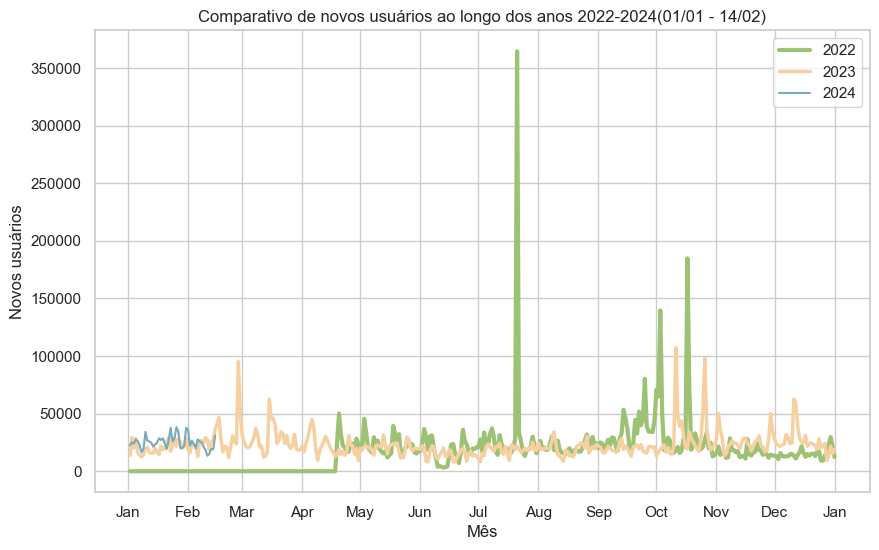

In [78]:
# NOVOS USUÁRIOS
usuarios_unicos_final = encontrar_frase_em_csv(r'Portal\usuariosUnicosNovos\2022\uniNovos22.csv', 'Novos usuários')

novos_usuarios_final = encontrar_frase_em_csv(r'Portal\usuariosUnicosNovos\2022\uniNovos22.csv', 'Tempo médio de engajamento')

novos_usuarios22 = pd.read_csv(r'Portal\usuariosUnicosNovos\2022\uniNovos22.csv', skiprows=usuarios_unicos_final-1, nrows=novos_usuarios_final-380).dropna()

#novos_usuarios = remover_ultima_linha(novos_usuarios)
novos_usuarios22 = transforma_int(novos_usuarios22)

novos_usuarios22['Nº dia'] = novos_usuarios22['Nº dia']+1

# NOVOS USUÁRIOS
usuarios_unicos_final = encontrar_frase_em_csv(r'Portal\usuariosUnicosNovos\2023\uniNovos23.csv', 'Novos usuários')

novos_usuarios_final = encontrar_frase_em_csv(r'Portal\usuariosUnicosNovos\2023\uniNovos23.csv', 'Tempo médio de engajamento')

novos_usuarios23 = pd.read_csv(r'Portal\usuariosUnicosNovos\2023\uniNovos23.csv', skiprows=usuarios_unicos_final-1, nrows=novos_usuarios_final-380).dropna()

#novos_usuarios = remover_ultima_linha(novos_usuarios)
novos_usuarios23 = transforma_int(novos_usuarios23)

novos_usuarios23['Nº dia'] = novos_usuarios23['Nº dia']+1

# NOVOS USUÁRIOS
usuarios_unicos_final = encontrar_frase_em_csv(r'Portal\usuariosUnicosNovos\2024\uniNovos24.csv', 'Novos usuários')

novos_usuarios_final = encontrar_frase_em_csv(r'Portal\usuariosUnicosNovos\2024\uniNovos24.csv', 'Tempo médio de engajamento')

novos_usuarios24 = pd.read_csv(r'Portal\usuariosUnicosNovos\2024\uniNovos24.csv', skiprows=usuarios_unicos_final-1, nrows=novos_usuarios_final-60).dropna()

novos_usuarios = remover_ultima_linha(novos_usuarios24)
novos_usuarios24 = transforma_int(novos_usuarios24)

novos_usuarios24['Nº dia'] = novos_usuarios24['Nº dia']+1

# Configurando o tema do Seaborn
sns.set_theme(style="whitegrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#9EC274","#7AB","#F6D0A0"]

# cores = ["#EE7B12", "#355424", "#ED3013", "#9EC274","#7AB","#EDA"]

# Plotando o gráfico de linhas
sns.lineplot(x="Nº dia", y="Novos usuários", data=novos_usuarios22, label="2022", linewidth=3, color=cores[0])
sns.lineplot(x="Nº dia", y="Novos usuários", data=novos_usuarios23, label="2023", linewidth=2.5, color=cores[2])
sns.lineplot(x="Nº dia", y="Novos usuários", data=novos_usuarios24, label="2024", linewidth=1.5, color=cores[1])


# Ajustando o intervalo entre as datas no eixo x
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Intervalo de 1 dia

# Formatando os rótulos do eixo x para incluir o nome do mês
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Exemplo: Jan 2024

#plt.xticks(rotation=-90)

# Adicionando rótulos e título ao gráfico
plt.xlabel("Mês")
#plt.ylabel("Alcance | Visitas | Seguidores")
plt.title("Comparativo de novos usuários ao longo dos anos 2022-2024(01/01 - 14/02)")

#plt.yticks([])

plt.legend()

# Exibindo o gráfico
plt.show()

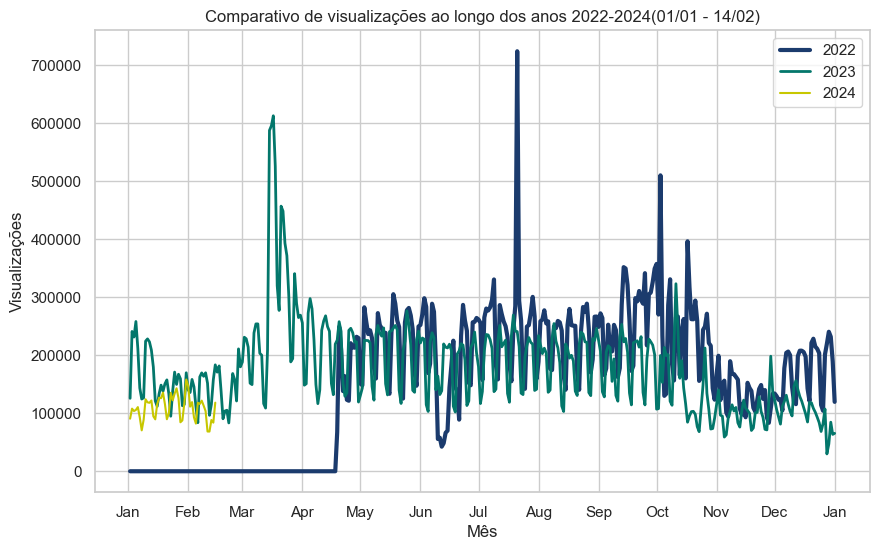

In [77]:
# VISUALIZAÇÕES
visualizacoes_inicio = encontrar_frase_em_csv(r'Portal\visualizacoes\2022\visualizacoes22.csv', 'Visualizações')
visualizacoes_final = encontrar_frase_em_csv(r'Portal\visualizacoes\2022\visualizacoes22.csv', 'Contagem de eventos')

visualizacoes22 = pd.read_csv(r'Portal\visualizacoes\2022\visualizacoes22.csv', skiprows=visualizacoes_inicio-1, nrows=visualizacoes_final-1118).dropna()

visualizacoes22 = remover_ultima_linha(visualizacoes22)
visualizacoes22 = transforma_int(visualizacoes22)

visualizacoes22['Nº dia'] = visualizacoes22['Nº dia']+1

# VISUALIZAÇÕES
visualizacoes_inicio = encontrar_frase_em_csv(r'Portal\visualizacoes\2023\visualizacoes23.csv', 'Visualizações')
visualizacoes_final = encontrar_frase_em_csv(r'Portal\visualizacoes\2023\visualizacoes23.csv', 'Contagem de eventos')

visualizacoes23 = pd.read_csv(r'Portal\visualizacoes\2023\visualizacoes23.csv', skiprows=visualizacoes_inicio-1, nrows=visualizacoes_final-1118).dropna()

visualizacoes23 = remover_ultima_linha(visualizacoes23)
visualizacoes23 = transforma_int(visualizacoes23)

visualizacoes23['Nº dia'] = visualizacoes23['Nº dia']+1

# VISUALIZAÇÕES
visualizacoes_inicio = encontrar_frase_em_csv(r'Portal\visualizacoes\2024\visualizacoes24.csv', 'Visualizações')
visualizacoes_final = encontrar_frase_em_csv(r'Portal\visualizacoes\2024\visualizacoes24.csv', 'Contagem de eventos')

visualizacoes24 = pd.read_csv(r'Portal\visualizacoes\2024\visualizacoes24.csv', skiprows=visualizacoes_inicio-1, nrows=visualizacoes_final-158).dropna()

visualizacoes24 = remover_ultima_linha(visualizacoes24)
visualizacoes24 = transforma_int(visualizacoes24)

visualizacoes24['Nº dia'] = visualizacoes24['Nº dia']+1

# Configurando o tema do Seaborn
sns.set_theme(style="whitegrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#1B3B6D","#03776B","#C7C700"]

# cores = ["#EE7B12", "#355424", "#ED3013", "#9EC274","#7AB","#EDA"]

# Plotando o gráfico de linhas
sns.lineplot(x="Nº dia", y="Visualizações", data=visualizacoes22, label="2022", linewidth=3, color=cores[0])
sns.lineplot(x="Nº dia", y="Visualizações", data=visualizacoes23, label="2023", linewidth=2, color=cores[1])
sns.lineplot(x="Nº dia", y="Visualizações", data=visualizacoes24, label="2024", linewidth=1.5, color=cores[2])


# Ajustando o intervalo entre as datas no eixo x
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Intervalo de 1 dia

# Formatando os rótulos do eixo x para incluir o nome do mês
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Exemplo: Jan 2024

#plt.xticks(rotation=-90)

# Adicionando rótulos e título ao gráfico
plt.xlabel("Mês")
#plt.ylabel("Alcance | Visitas | Seguidores")
plt.title("Comparativo de visualizações ao longo dos anos 2022-2024(01/01 - 14/02)")

#plt.yticks([])

plt.legend()

# Exibindo o gráfico
plt.show()

In [6]:
# USUARIOS RECORRENTES
recorrentes_inicio = encontrar_frase_em_csv(r'Portal\usuariosRec\2022\novosRec22.csv', 'Usuários recorrentes')
recorrentes_final = encontrar_frase_em_csv(r'Portal\usuariosRec\2022\novosRec22.csv', 'Dia 1')

usuarios_recorrentes22 = pd.read_csv(r'Portal\usuariosRec\2022\novosRec22.csv', skiprows=recorrentes_inicio-1, nrows=recorrentes_final-383).dropna()

#usuarios_recorrentes22 = remover_ultima_linha(usuarios_recorrentes22)
usuarios_recorrentes22 = transforma_int(usuarios_recorrentes22)

usuarios_recorrentes22['Nº dia'] = usuarios_recorrentes22['Nº dia']+1

# USUARIOS RECORRENTES
recorrentes_inicio = encontrar_frase_em_csv(r'Portal\usuariosRec\2023\novosRec23.csv', 'Usuários recorrentes')
recorrentes_final = encontrar_frase_em_csv(r'Portal\usuariosRec\2023\novosRec23.csv', 'Dia 1')

usuarios_recorrentes23 = pd.read_csv(r'Portal\usuariosRec\2023\novosRec23.csv', skiprows=recorrentes_inicio-1, nrows=recorrentes_final-383).dropna()

#usuarios_recorrentes23 = remover_ultima_linha(usuarios_recorrentes23)
usuarios_recorrentes23 = transforma_int(usuarios_recorrentes23)

usuarios_recorrentes23['Nº dia'] = usuarios_recorrentes23['Nº dia']+1

# USUARIOS RECORRENTES
recorrentes_inicio = encontrar_frase_em_csv(r'Portal\usuariosRec\2024\novosRec24.csv', 'Usuários recorrentes')
recorrentes_final = encontrar_frase_em_csv(r'Portal\usuariosRec\2024\novosRec24.csv', 'Dia 1')

usuarios_recorrentes24 = pd.read_csv(r'Portal\usuariosRec\2024\novosRec24.csv', skiprows=recorrentes_inicio-1, nrows=recorrentes_final-63).dropna()

#usuarios_recorrentes24 = remover_ultima_linha(usuarios_recorrentes24)
usuarios_recorrentes24 = transforma_int(usuarios_recorrentes24)

usuarios_recorrentes24['Nº dia'] = usuarios_recorrentes24['Nº dia']+1

In [7]:
def usuRec_total(arquivo):
    # USUARIOS RECORRENTES
    recorrentes_inicio = encontrar_frase_em_csv(arquivo, 'Usuários recorrentes')
    recorrentes_final = encontrar_frase_em_csv(arquivo, 'Dia 1')

    usuarios_recorrentes = pd.read_csv(arquivo, skiprows=recorrentes_inicio-1, nrows=recorrentes_final-48).dropna()

    usuarios_recorrentes = remover_ultima_linha(usuarios_recorrentes)
    usuarios_recorrentes = transforma_int(usuarios_recorrentes)

    usuarios_recorrentes['Nº dia'] = usuarios_recorrentes['Nº dia']+1   
    
    usuarios_recorrentes_total = usuarios_recorrentes['Usuários recorrentes'].sum().astype('int')
    
    return usuarios_recorrentes_total

def percentUsuRec(usuRecANALYTICS,usuRecTABELA):
    
    porcentagem = (usuRecANALYTICS/usuRecTABELA)
    
    return porcentagem

In [8]:
# CALCULOS DE PORCENTAGEM USUÁRIOS RECORRENTES 2022
novosRecAbril22 = usuRec_total(r'Portal\usuariosRec\2022\novosRecAbril.csv')
novosRecMaio22 = usuRec_total(r'Portal\usuariosRec\2022\novosRecMaio.csv')
novosRecJunho22 = usuRec_total(r'Portal\usuariosRec\2022\novosRecJunho.csv')
novosRecJulho22 = usuRec_total(r'Portal\usuariosRec\2022\novosRecJulho.csv')
novosRecAgosto22 = usuRec_total(r'Portal\usuariosRec\2022\novosRecAgosto.csv')
novosRecSetembro22 = usuRec_total(r'Portal\usuariosRec\2022\novosRecSetembro.csv')
novosRecOutubro22 = usuRec_total(r'Portal\usuariosRec\2022\novosRecOutubro.csv')
novosRecNovembro22 = usuRec_total(r'Portal\usuariosRec\2022\novosRecNovembro.csv')
novosRecDezembro22 = usuRec_total(r'Portal\usuariosRec\2022\novosRecDezembro.csv')
usuRec_2022 = [0, 0, 0, 72000, 149000, 168000, 252000, 234000, 334000, 338000, 203000, 172000]

usuRec_2022Percent = [0, 0, 0, percentUsuRec(usuRec_2022[3], novosRecAbril22), percentUsuRec(usuRec_2022[4], novosRecMaio22), percentUsuRec(usuRec_2022[5], novosRecJunho22), percentUsuRec(usuRec_2022[6], novosRecJulho22), percentUsuRec(usuRec_2022[7], novosRecAgosto22), percentUsuRec(usuRec_2022[8], novosRecSetembro22), percentUsuRec(usuRec_2022[9], novosRecOutubro22), percentUsuRec(usuRec_2022[10], novosRecNovembro22), percentUsuRec(usuRec_2022[11], novosRecDezembro22)]

# CALCULOS DE PORCENTAGEM USUÁRIOS RECORRENTES 2023
novosRecJan23 = usuRec_total(r'Portal\usuariosRec\2023\novosRecJan.csv')
novosRecFev23 = usuRec_total(r'Portal\usuariosRec\2023\novosRecFev.csv')
novosRecMar23 = usuRec_total(r'Portal\usuariosRec\2023\novosRecMar.csv')
novosRecAbril23 = usuRec_total(r'Portal\usuariosRec\2023\novosRecAbril.csv')
novosRecMaio23 = usuRec_total(r'Portal\usuariosRec\2023\novosRecMaio.csv')
novosRecJunho23 = usuRec_total(r'Portal\usuariosRec\2023\novosRecJunho.csv')
novosRecJulho23 = usuRec_total(r'Portal\usuariosRec\2023\novosRecJulho.csv')
novosRecAgosto23 = usuRec_total(r'Portal\usuariosRec\2023\novosRecAgosto.csv')
novosRecSetembro23 = usuRec_total(r'Portal\usuariosRec\2023\novosRecSetembro.csv')
novosRecOutubro23 = usuRec_total(r'Portal\usuariosRec\2023\novosRecOutubro.csv')
novosRecNovembro23 = usuRec_total(r'Portal\usuariosRec\2023\novosRecNovembro.csv')
novosRecDezembro23 = usuRec_total(r'Portal\usuariosRec\2023\novosRecDezembro.csv')
usuRec_2023 =  [203000,220000,302000,205000,192000,169000,175000,194000,186000,250000,270000,289000]

usuRec_2023Percent = [percentUsuRec(usuRec_2023[0], novosRecJan23), percentUsuRec(usuRec_2023[1], novosRecFev23), percentUsuRec(usuRec_2023[2], novosRecMar23), percentUsuRec(usuRec_2023[3], novosRecAbril23), percentUsuRec(usuRec_2023[4], novosRecMaio23), percentUsuRec(usuRec_2023[5], novosRecJunho23), percentUsuRec(usuRec_2023[6], novosRecJulho22), percentUsuRec(usuRec_2023[7], novosRecAgosto22), percentUsuRec(usuRec_2023[8], novosRecSetembro22), percentUsuRec(usuRec_2023[9], novosRecOutubro22), percentUsuRec(usuRec_2023[10], novosRecNovembro22), percentUsuRec(usuRec_2023[11], novosRecDezembro22)]

# CALCULOS DE PORCENTAGEM USUÁRIOS RECORRENTES 2024
novosRecJan24 = usuRec_total(r'Portal\usuariosRec\2024\novosRecJan.csv')
usuRec_2024 = [279000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

usuRec_2024Percent = [percentUsuRec(usuRec_2024[0], novosRecJan24)]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6996\1720802430.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seriesComColunaSelecionada2024[0:31] = round(seriesComColunaSelecionada2024[0:31]*porcentagem[0]) #Jan


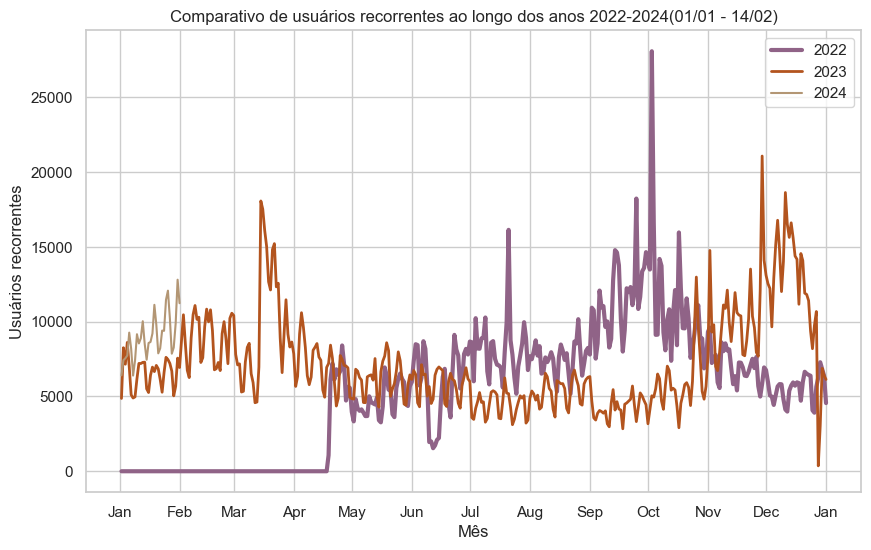

In [80]:
def usuRec_total(arquivo):
    # USUARIOS RECORRENTES
    recorrentes_inicio = encontrar_frase_em_csv(arquivo, 'Usuários recorrentes')
    recorrentes_final = encontrar_frase_em_csv(arquivo, 'Dia 1')

    usuarios_recorrentes = pd.read_csv(arquivo, skiprows=recorrentes_inicio-1, nrows=recorrentes_final-48).dropna()

    usuarios_recorrentes = remover_ultima_linha(usuarios_recorrentes)
    usuarios_recorrentes = transforma_int(usuarios_recorrentes)

    usuarios_recorrentes['Nº dia'] = usuarios_recorrentes['Nº dia']+1   
    
    usuarios_recorrentes_total = usuarios_recorrentes['Usuários recorrentes'].sum().astype('int')
    
    return usuarios_recorrentes_total

def percentUsuRec(usuRecANALYTICS,usuRecTABELA):
    
    porcentagem = (usuRecANALYTICS/usuRecTABELA)
    
    return porcentagem

# USUARIOS RECORRENTES
recorrentes_inicio = encontrar_frase_em_csv(r'Portal\usuariosRec\2022\novosRec22.csv', 'Usuários recorrentes')
recorrentes_final = encontrar_frase_em_csv(r'Portal\usuariosRec\2022\novosRec22.csv', 'Dia 1')

usuarios_recorrentes22 = pd.read_csv(r'Portal\usuariosRec\2022\novosRec22.csv', skiprows=recorrentes_inicio-1, nrows=recorrentes_final-383).dropna()

#usuarios_recorrentes22 = remover_ultima_linha(usuarios_recorrentes22)
usuarios_recorrentes22 = transforma_int(usuarios_recorrentes22)

usuarios_recorrentes22['Nº dia'] = usuarios_recorrentes22['Nº dia']+1

# USUARIOS RECORRENTES
recorrentes_inicio = encontrar_frase_em_csv(r'Portal\usuariosRec\2023\novosRec23.csv', 'Usuários recorrentes')
recorrentes_final = encontrar_frase_em_csv(r'Portal\usuariosRec\2023\novosRec23.csv', 'Dia 1')

usuarios_recorrentes23 = pd.read_csv(r'Portal\usuariosRec\2023\novosRec23.csv', skiprows=recorrentes_inicio-1, nrows=recorrentes_final-383).dropna()

#usuarios_recorrentes23 = remover_ultima_linha(usuarios_recorrentes23)
usuarios_recorrentes23 = transforma_int(usuarios_recorrentes23)

usuarios_recorrentes23['Nº dia'] = usuarios_recorrentes23['Nº dia']+1

# USUARIOS RECORRENTES
recorrentes_inicio = encontrar_frase_em_csv(r'Portal\usuariosRec\2024\novosRecJan.csv', 'Usuários recorrentes')
recorrentes_final = encontrar_frase_em_csv(r'Portal\usuariosRec\2024\novosRecJan.csv', 'Dia 1')

usuarios_recorrentes24 = pd.read_csv(r'Portal\usuariosRec\2024\novosRecJan.csv', skiprows=recorrentes_inicio-1, nrows=recorrentes_final-48).dropna()

usuarios_recorrentes24 = remover_ultima_linha(usuarios_recorrentes24)
usuarios_recorrentes24 = transforma_int(usuarios_recorrentes24)

usuarios_recorrentes24['Nº dia'] = usuarios_recorrentes24['Nº dia']+1

# CALCULOS DE PORCENTAGEM USUÁRIOS RECORRENTES 2022
novosRecAbril22 = usuRec_total(r'Portal\usuariosRec\2022\novosRecAbril.csv')
novosRecMaio22 = usuRec_total(r'Portal\usuariosRec\2022\novosRecMaio.csv')
novosRecJunho22 = usuRec_total(r'Portal\usuariosRec\2022\novosRecJunho.csv')
novosRecJulho22 = usuRec_total(r'Portal\usuariosRec\2022\novosRecJulho.csv')
novosRecAgosto22 = usuRec_total(r'Portal\usuariosRec\2022\novosRecAgosto.csv')
novosRecSetembro22 = usuRec_total(r'Portal\usuariosRec\2022\novosRecSetembro.csv')
novosRecOutubro22 = usuRec_total(r'Portal\usuariosRec\2022\novosRecOutubro.csv')
novosRecNovembro22 = usuRec_total(r'Portal\usuariosRec\2022\novosRecNovembro.csv')
novosRecDezembro22 = usuRec_total(r'Portal\usuariosRec\2022\novosRecDezembro.csv')
usuRec_2022 = [0, 0, 0, 72000, 149000, 168000, 252000, 234000, 334000, 338000, 203000, 172000]

usuRec_2022Percent = [0, 0, 0, percentUsuRec(usuRec_2022[3], novosRecAbril22), percentUsuRec(usuRec_2022[4], novosRecMaio22), percentUsuRec(usuRec_2022[5], novosRecJunho22), percentUsuRec(usuRec_2022[6], novosRecJulho22), percentUsuRec(usuRec_2022[7], novosRecAgosto22), percentUsuRec(usuRec_2022[8], novosRecSetembro22), percentUsuRec(usuRec_2022[9], novosRecOutubro22), percentUsuRec(usuRec_2022[10], novosRecNovembro22), percentUsuRec(usuRec_2022[11], novosRecDezembro22)]

# CALCULOS DE PORCENTAGEM USUÁRIOS RECORRENTES 2023
novosRecJan23 = usuRec_total(r'Portal\usuariosRec\2023\novosRecJan.csv')
novosRecFev23 = usuRec_total(r'Portal\usuariosRec\2023\novosRecFev.csv')
novosRecMar23 = usuRec_total(r'Portal\usuariosRec\2023\novosRecMar.csv')
novosRecAbril23 = usuRec_total(r'Portal\usuariosRec\2023\novosRecAbril.csv')
novosRecMaio23 = usuRec_total(r'Portal\usuariosRec\2023\novosRecMaio.csv')
novosRecJunho23 = usuRec_total(r'Portal\usuariosRec\2023\novosRecJunho.csv')
novosRecJulho23 = usuRec_total(r'Portal\usuariosRec\2023\novosRecJulho.csv')
novosRecAgosto23 = usuRec_total(r'Portal\usuariosRec\2023\novosRecAgosto.csv')
novosRecSetembro23 = usuRec_total(r'Portal\usuariosRec\2023\novosRecSetembro.csv')
novosRecOutubro23 = usuRec_total(r'Portal\usuariosRec\2023\novosRecOutubro.csv')
novosRecNovembro23 = usuRec_total(r'Portal\usuariosRec\2023\novosRecNovembro.csv')
novosRecDezembro23 = usuRec_total(r'Portal\usuariosRec\2023\novosRecDezembro.csv')
usuRec_2023 =  [203000,220000,302000,205000,192000,169000,175000,194000,186000,250000,270000,289000]

usuRec_2023Percent = [percentUsuRec(usuRec_2023[0], novosRecJan23), percentUsuRec(usuRec_2023[1], novosRecFev23), percentUsuRec(usuRec_2023[2], novosRecMar23), percentUsuRec(usuRec_2023[3], novosRecAbril23), percentUsuRec(usuRec_2023[4], novosRecMaio23), percentUsuRec(usuRec_2023[5], novosRecJunho23), percentUsuRec(usuRec_2023[6], novosRecJulho22), percentUsuRec(usuRec_2023[7], novosRecAgosto22), percentUsuRec(usuRec_2023[8], novosRecSetembro22), percentUsuRec(usuRec_2023[9], novosRecOutubro22), percentUsuRec(usuRec_2023[10], novosRecNovembro22), percentUsuRec(usuRec_2023[11], novosRecDezembro22)]

# CALCULOS DE PORCENTAGEM USUÁRIOS RECORRENTES 2024
novosRecJan24 = usuRec_total(r'Portal\usuariosRec\2024\novosRecJan.csv')
#novosRecFev24 = usuRec_total(r'Portal\usuariosRec\2024\novosRecFev.csv')

usuRec_2024 = [279000, 154000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

usuRec_2024Percent = [percentUsuRec(usuRec_2024[0], novosRecJan24)]

# MESES 2022
usuarios_recorrentes22[0:31] #Jan
usuarios_recorrentes22[31:59] #Fev
usuarios_recorrentes22[59:90] #Mar
usuarios_recorrentes22[90:120] #Abr
usuarios_recorrentes22[120:151] #Mai
usuarios_recorrentes22[151:181] #Jun
usuarios_recorrentes22[181:212] #Jul
usuarios_recorrentes22[212:243] #Ago
usuarios_recorrentes22[243:273] #Set
usuarios_recorrentes22[273:304] #Out
usuarios_recorrentes22[304:334] #Nov
usuarios_recorrentes22[334:365] #Dez

# MESES 2023
usuarios_recorrentes23[0:31] #Jan
usuarios_recorrentes23[31:59] #Fev
usuarios_recorrentes23[59:90] #Mar
usuarios_recorrentes23[90:120] #Abr
usuarios_recorrentes23[120:151] #Mai
usuarios_recorrentes23[151:181] #Jun
usuarios_recorrentes23[181:212] #Jul
usuarios_recorrentes23[212:243] #Ago
usuarios_recorrentes23[243:273] #Set
usuarios_recorrentes23[273:304] #Out
usuarios_recorrentes23[304:334] #Nov
usuarios_recorrentes23[334:365] #Dez

# MESES 2024
usuarios_recorrentes24[0:31] #Jan
usuarios_recorrentes24[31:45] = 0 #Fev

def aproxUsuRecANO(seriesComColunaSelecionada, porcentagem):
    seriesComColunaSelecionada[0:31] = round(seriesComColunaSelecionada[0:31]*porcentagem[0]) #Jan
    seriesComColunaSelecionada[31:59] = round(seriesComColunaSelecionada[31:59]*porcentagem[1]) #Fev
    seriesComColunaSelecionada[59:90] = round(seriesComColunaSelecionada[59:90]*porcentagem[2]) #Mar
    seriesComColunaSelecionada[90:120] = round(seriesComColunaSelecionada[90:120]*porcentagem[3]) #Abr
    seriesComColunaSelecionada[120:151] = round(seriesComColunaSelecionada[120:151]*porcentagem[4]) #Mai
    seriesComColunaSelecionada[151:181] = round(seriesComColunaSelecionada[151:181]*porcentagem[5]) #Jun
    seriesComColunaSelecionada[181:212] = round(seriesComColunaSelecionada[181:212]*porcentagem[6]) #Jul
    seriesComColunaSelecionada[212:243] = round(seriesComColunaSelecionada[212:243]*porcentagem[7]) #Ago
    seriesComColunaSelecionada[243:273] = round(seriesComColunaSelecionada[243:273]*porcentagem[8]) #Set
    seriesComColunaSelecionada[273:304] = round(seriesComColunaSelecionada[273:304]*porcentagem[9]) #Out
    seriesComColunaSelecionada[304:334] = round(seriesComColunaSelecionada[304:334]*porcentagem[10]) #Nov
    seriesComColunaSelecionada[334:365] = round(seriesComColunaSelecionada[334:365]*porcentagem[11]) #Dez    
    return seriesComColunaSelecionada

def aproxUsuRec2024(seriesComColunaSelecionada2024, porcentagem):
    seriesComColunaSelecionada2024[0:31] = round(seriesComColunaSelecionada2024[0:31]*porcentagem[0]) #Jan
    #seriesComColunaSelecionada2024[31:59] = round(seriesComColunaSelecionada2024[31:45]*porcentagem[1]) #Fev   
    return seriesComColunaSelecionada2024


usuarios_recorrentes22['Usuários recorrentes'] = aproxUsuRecANO(usuarios_recorrentes22['Usuários recorrentes'], usuRec_2022Percent)

usuarios_recorrentes23['Usuários recorrentes'] = aproxUsuRecANO(usuarios_recorrentes23['Usuários recorrentes'], usuRec_2023Percent)

usuarios_recorrentes24['Usuários recorrentes'] = aproxUsuRec2024(usuarios_recorrentes24['Usuários recorrentes'], usuRec_2024Percent)

# Configurando o tema do Seaborn
sns.set_theme(style="whitegrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#906387","#b3541e","#B39674"]

# cores = ["#EE7B12", "#355424", "#ED3013", "#9EC274","#7AB","#EDA"]

# Plotando o gráfico de linhas
sns.lineplot(x="Nº dia", y="Usuários recorrentes", data=usuarios_recorrentes22, label="2022", linewidth=3, color=cores[0])
sns.lineplot(x="Nº dia", y="Usuários recorrentes", data=usuarios_recorrentes23, label="2023", linewidth=2, color=cores[1])
sns.lineplot(x="Nº dia", y="Usuários recorrentes", data=usuarios_recorrentes24, label="2024", linewidth=1.5, color=cores[2])


# Ajustando o intervalo entre as datas no eixo x
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Intervalo de 1 dia

# Formatando os rótulos do eixo x para incluir o nome do mês
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Exemplo: Jan 2024

#plt.xticks(rotation=-90)

# Adicionando rótulos e título ao gráfico
plt.xlabel("Mês")
#plt.ylabel("Alcance | Visitas | Seguidores")
plt.title("Comparativo de usuários recorrentes ao longo dos anos 2022-2024(01/01 - 14/02)")

#plt.yticks([])

plt.legend()

# Exibindo o gráfico
plt.show()

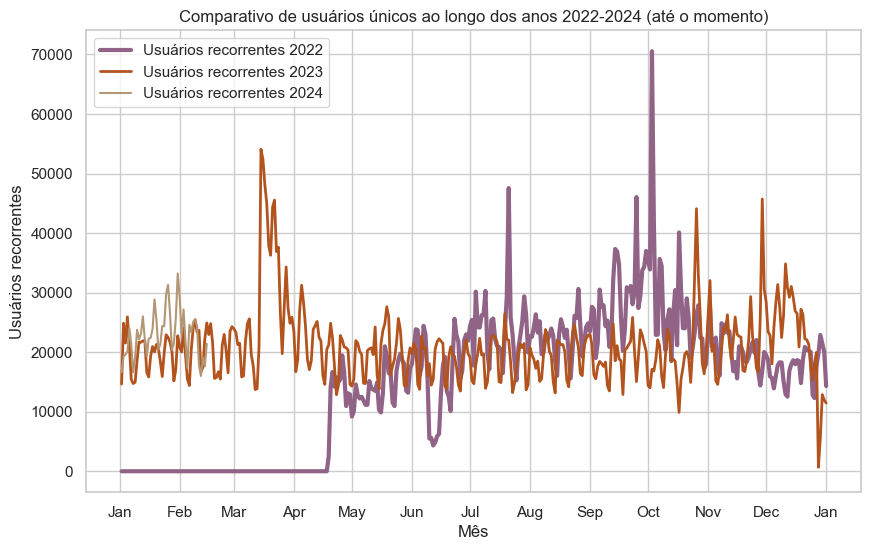

In [68]:
# USUARIOS RECORRENTES
recorrentes_inicio = encontrar_frase_em_csv(r'Portal\usuariosRec\2022\novosRec22.csv', 'Usuários recorrentes')
recorrentes_final = encontrar_frase_em_csv(r'Portal\usuariosRec\2022\novosRec22.csv', 'Dia 1')

usuarios_recorrentes22 = pd.read_csv(r'Portal\usuariosRec\2022\novosRec22.csv', skiprows=recorrentes_inicio-1, nrows=recorrentes_final-383).dropna()

#usuarios_recorrentes22 = remover_ultima_linha(usuarios_recorrentes22)
usuarios_recorrentes22 = transforma_int(usuarios_recorrentes22)

usuarios_recorrentes22['Nº dia'] = usuarios_recorrentes22['Nº dia']+1

# USUARIOS RECORRENTES
recorrentes_inicio = encontrar_frase_em_csv(r'Portal\usuariosRec\2023\novosRec23.csv', 'Usuários recorrentes')
recorrentes_final = encontrar_frase_em_csv(r'Portal\usuariosRec\2023\novosRec23.csv', 'Dia 1')

usuarios_recorrentes23 = pd.read_csv(r'Portal\usuariosRec\2023\novosRec23.csv', skiprows=recorrentes_inicio-1, nrows=recorrentes_final-383).dropna()

#usuarios_recorrentes23 = remover_ultima_linha(usuarios_recorrentes23)
usuarios_recorrentes23 = transforma_int(usuarios_recorrentes23)

usuarios_recorrentes23['Nº dia'] = usuarios_recorrentes23['Nº dia']+1

# USUARIOS RECORRENTES
recorrentes_inicio = encontrar_frase_em_csv(r'Portal\usuariosRec\2024\novosRec24.csv', 'Usuários recorrentes')
recorrentes_final = encontrar_frase_em_csv(r'Portal\usuariosRec\2024\novosRec24.csv', 'Dia 1')

usuarios_recorrentes24 = pd.read_csv(r'Portal\usuariosRec\2024\novosRec24.csv', skiprows=recorrentes_inicio-1, nrows=recorrentes_final-63).dropna()

#usuarios_recorrentes24 = remover_ultima_linha(usuarios_recorrentes24)
usuarios_recorrentes24 = transforma_int(usuarios_recorrentes24)

usuarios_recorrentes24['Nº dia'] = usuarios_recorrentes24['Nº dia']+1

# Configurando o tema do Seaborn
sns.set_theme(style="whitegrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#906387","#b3541e","#B39674"]

# cores = ["#EE7B12", "#355424", "#ED3013", "#9EC274","#7AB","#EDA"]

# Plotando o gráfico de linhas
sns.lineplot(x="Nº dia", y="Usuários recorrentes", data=usuarios_recorrentes22, label="Usuários recorrentes 2022", linewidth=3, color=cores[0])
sns.lineplot(x="Nº dia", y="Usuários recorrentes", data=usuarios_recorrentes23, label="Usuários recorrentes 2023", linewidth=2, color=cores[1])
sns.lineplot(x="Nº dia", y="Usuários recorrentes", data=usuarios_recorrentes24, label="Usuários recorrentes 2024", linewidth=1.5, color=cores[2])


# Ajustando o intervalo entre as datas no eixo x
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Intervalo de 1 dia

# Formatando os rótulos do eixo x para incluir o nome do mês
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Exemplo: Jan 2024

#plt.xticks(rotation=-90)

# Adicionando rótulos e título ao gráfico
plt.xlabel("Mês")
#plt.ylabel("Alcance | Visitas | Seguidores")
plt.title("Comparativo de usuários únicos ao longo dos anos 2022-2024 (até o momento)")

#plt.yticks([])

plt.legend()

# Exibindo o gráfico
plt.show()

In [ ]:
import numpy as np

# Vetor original
vetor_original = np.array([1, 2, 3, 4, 5])

# Número de zeros para adicionar no início e no final
num_zeros_inicio = 2
num_zeros_final = 3

# Preencher com zeros
vetor_preenchido = np.pad(vetor_original, (0, 5), mode='constant')

print(vetor_preenchido)


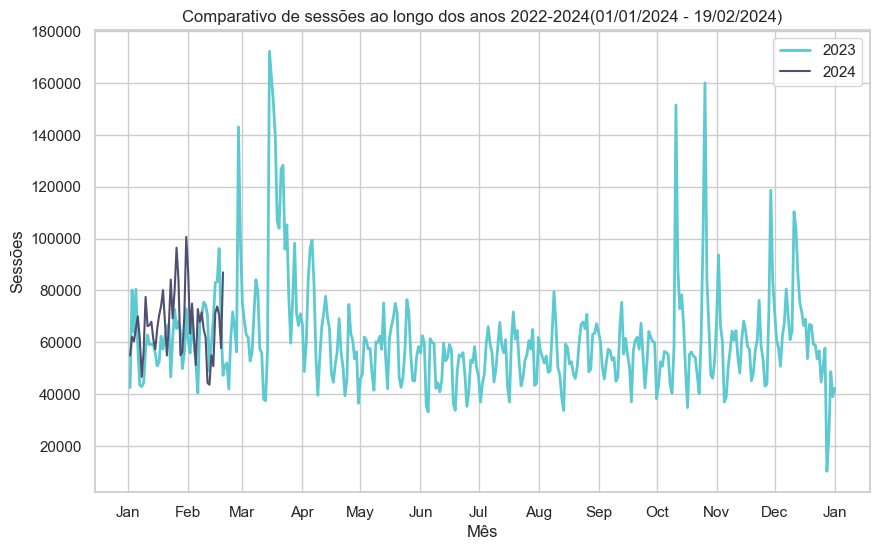

In [15]:
sessoes2023 = pd.read_csv(r'Portal\sessoes\sessoes2023.csv', skiprows=7)

sessoes2023.columns = ['Data','Nº dia','sessoes','nan']

sessoes2023['Nº dia'] = sessoes2023['Nº dia']+1

sessoes2024 = pd.read_csv(r'Portal\sessoes\sessoes2024.csv', skiprows=7)

sessoes2024.columns = ['Data','Nº dia','sessoes','nan']

sessoes2024['Nº dia'] = sessoes2024['Nº dia']+1

# Configurando o tema do Seaborn
sns.set_theme(style="whitegrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#252745","#4f4f70","#5ccad0"]

# cores = ["#EE7B12", "#355424", "#ED3013", "#9EC274","#7AB","#EDA"]

# Plotando o gráfico de linhas
# sns.lineplot(x="Nº dia", y="Usuários recorrentes", data=usuarios_recorrentes22, label="Usuários recorrentes 2022", linewidth=3, color=cores[0])
sns.lineplot(x="Nº dia", y="sessoes", data=sessoes2023, label="2023", linewidth=2, color=cores[2])
sns.lineplot(x="Nº dia", y="sessoes", data=sessoes2024, label="2024", linewidth=1.5, color=cores[1])


# Ajustando o intervalo entre as datas no eixo x
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Intervalo de 1 dia

# Formatando os rótulos do eixo x para incluir o nome do mês
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Exemplo: Jan 2024

#plt.xticks(rotation=-90)

# Adicionando rótulos e título ao gráfico
plt.xlabel("Mês")
plt.ylabel("Sessões")
plt.title("Comparativo de sessões ao longo dos anos 2022-2024(01/01/2024 - 19/02/2024)")

#plt.yticks([])

plt.legend()

# Exibindo o gráfico
plt.show()

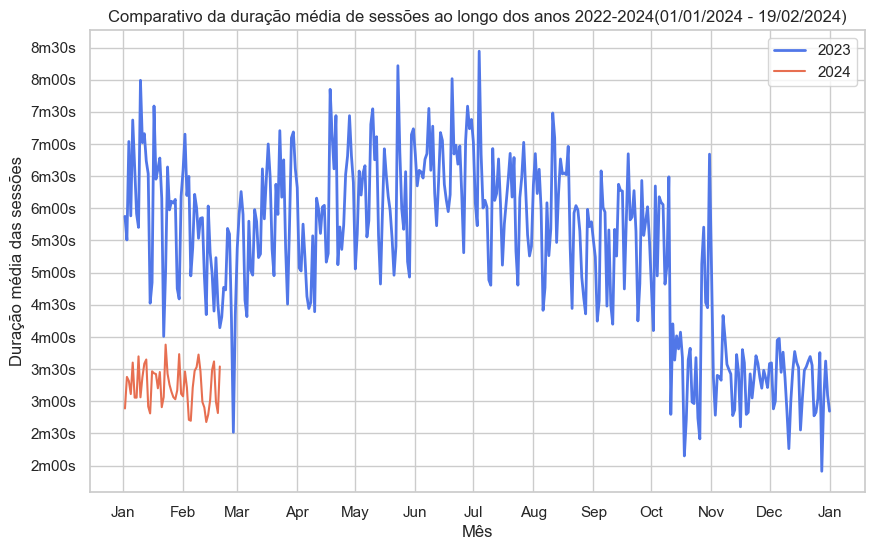

In [17]:
from matplotlib.ticker import FuncFormatter, MultipleLocator

sessoesDurMed2023 = pd.read_csv(r'Portal\sessoes\sessoesDurMed2023.csv', skiprows=7)

sessoesDurMed2023.columns = ['Data','Nº dia','sessoes','nan']

sessoesDurMed2023['Nº dia'] = sessoesDurMed2023['Nº dia']+1

sessoesDurMed2024 = pd.read_csv(r'Portal\sessoes\sessoesDurMed2024.csv', skiprows=7)

sessoesDurMed2024.columns = ['Data','Nº dia','sessoes','nan']

sessoesDurMed2024['Nº dia'] = sessoesDurMed2024['Nº dia']+1

sessoesDurMed2023['sessoes'] = sessoesDurMed2023['sessoes'] / 60
sessoesDurMed2024['sessoes'] = sessoesDurMed2024['sessoes'] / 60

# Configurando o tema do Seaborn
sns.set_theme(style="whitegrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#264653","#e76f51","#5177E8"]

# cores = ["#EE7B12", "#355424", "#ED3013", "#9EC274","#7AB","#EDA"]

# Plotando o gráfico de linhas
# sns.lineplot(x="Nº dia", y="Usuários recorrentes", data=usuarios_recorrentes22, label="Usuários recorrentes 2022", linewidth=3, color=cores[0])
sns.lineplot(x="Nº dia", y="sessoes", data=sessoesDurMed2023, label="2023", linewidth=2, color=cores[2])
sns.lineplot(x="Nº dia", y="sessoes", data=sessoesDurMed2024, label="2024", linewidth=1.5, color=cores[1])


# Ajustando o intervalo entre as datas no eixo x
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Intervalo de 1 dia

# Formatando os rótulos do eixo x para incluir o nome do mês
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Exemplo: Jan 2024

def minutos_formatter(x, pos):
    minutos = int(x)
    segundos = round((x - minutos) * 60)
    return f"{minutos}m{segundos:02d}s"

# Configurando o formato dos valores do eixo Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(minutos_formatter))

#plt.yticks([2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5])

#plt.gca().yaxis.set_major_locator(MultipleLocator(9))
#plt.gca().yaxis.set_major_locator(plt.MaxNLocator(8))
# Definindo o passo entre os números no eixo Y
plt.gca().yaxis.set_major_locator(MultipleLocator(0.5))

#plt.xticks(rotation=-90)

#plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Adicionando rótulos e título ao gráfico
plt.xlabel("Mês")
plt.ylabel("Duração média das sessões")
plt.title("Comparativo da duração média de sessões ao longo dos anos 2022-2024(01/01/2024 - 19/02/2024)")

#plt.yticks([])

plt.legend()

# Exibindo o gráfico
plt.show()